<h2>In this notebook a custom implementation of logisitc regression using Stochastic Gradient Descent is Implemented and asserted</h2>

<h4>First we create a dataset and check the results for sklearn's implementation of Logisitc Regression</h4>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [2]:

X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)


In [428]:
X.shape, y.shape

((50000, 15), (50000,))

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [6]:

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [8]:


clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf


SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [10]:
clf.fit(X=X_train, y=y_train) 

-- Epoch 1
Norm: 0.76, NNZs: 15, Bias: -0.316130, T: 37500, Avg. loss: 0.456770
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.476828, T: 75000, Avg. loss: 0.395862
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.97, NNZs: 15, Bias: -0.588118, T: 112500, Avg. loss: 0.386856
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 15, Bias: -0.667250, T: 150000, Avg. loss: 0.383443
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.03, NNZs: 15, Bias: -0.726549, T: 187500, Avg. loss: 0.381825
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.04, NNZs: 15, Bias: -0.769133, T: 225000, Avg. loss: 0.380862
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 1.05, NNZs: 15, Bias: -0.801827, T: 262500, Avg. loss: 0.380467
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 1.05, NNZs: 15, Bias: -0.827575, T: 300000, Avg. loss: 0.380167
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 1.06, NNZs: 15, Bias: -0.846799, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [11]:
clf.coef_, clf.coef_.shape, clf.intercept_


(array([[-0.42197358,  0.17755085, -0.14802932,  0.33585513, -0.20109342,
          0.56054998, -0.43735215, -0.08422888,  0.22158259,  0.18265604,
          0.18154486,  0.00304848, -0.07268168,  0.32830753,  0.02834674]]),
 (1, 15),
 array([-0.86031346]))

<h4>Now we start implementing our custom made Logistic Regression using SGD</h4>

In [12]:
def initialize_weights(dim):
    w = np.zeros_like(dim)
    b = 0
    

    
    return w,b

w,b =initialize_weights(X_train[0])
print(np.shape(w))


(15,)


In [13]:
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


In [14]:
import math
def sigmoid(z):
    sig = 1/(1+ math.exp(-z))
    

    return sig

In [15]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    loss1 = 0
    for i in range(0, len(y_true)):
        loss_instance = (y_true[i]* math.log10(y_pred[i])+ (1-y_true[i])*math.log10(1 - y_pred[i]))
        loss1 = loss1 + loss_instance
    loss = (-1*loss1)/len(y_true)
    return loss


In [17]:
def gradient_dw(x,y,w,b,alpha,N):
   
    
    dw1 = np.dot(w, x.T) + b
    dw2 = y - sigmoid(dw1)
    dw3 = np.dot(x,dw2)
    dw = dw3 - np.dot(alpha/N, w)
    
    return dw
 


In [22]:
def gradient_db(x,y,w,b): 
        
        db1 = np.dot(w,x.T) + b
        db2 = sigmoid(db1)
        db = y - db2 
        
        return db
    
        
     

In [23]:
def grader_db(x,y,w,b):
  grad_db=gradient_db(x,y,w,b)
  assert(grad_db==-0.5)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,-2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,3.67152472,  0.01451875,  2.01062888,
0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)

True

In [36]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    w,b = initialize_weights(X_train[0])
    epoch_number = []
    train_loss = []
    test_loss = []
    for k in range(0,epochs):
        
        epoch_number.append(k)
        for i in range(0,N):
            dw = gradient_dw(X_train[i], y_train[i], w, b, alpha, len(X_train))
            db = gradient_db(X_train[i], y_train[i], w, b)
            w = w + (eta0*dw)
            b = b + (eta0*db)
        y_pred_train = [0 for i in range(N)]
        for i in range(0,N):
            y_pred_train[i] = sigmoid(np.dot(w,X_train[i].T)+b)  
            
        loss_train = logloss(y_train,y_pred_train)
        train_loss.append(loss_train)
        print("Epoch number ",k)
        print("Loss train",loss_train)
        y_pred_test = [0 for i in range(len(y_test))]
        for i in range(0,len(X_test)):
            y_pred_test[i] = sigmoid(np.dot(w,X_test[i].T)+b)
        loss_test = logloss(y_test,y_pred_test)
        test_loss.append(loss_test)
        print("Loss Test",loss_test)
        print(100*"=")
    
   
    
        
    return w,b,epoch_number, train_loss, test_loss

In [37]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=50
w,b,epoch_number, train_loss, test_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)


Epoch number  0
Loss train 0.17603563250170023
Loss Test 0.17483126548515954
Epoch number  1
Loss train 0.169253466920771
Loss Test 0.1678232773887034
Epoch number  2
Loss train 0.16697029331536084
Loss Test 0.1655028547849492
Epoch number  3
Loss train 0.16594160983629203
Loss Test 0.16448570694661077
Epoch number  4
Loss train 0.16542612294311743
Loss Test 0.16399333059778456
Epoch number  5
Loss train 0.1651543834332655
Loss Test 0.16374490289232158
Epoch number  6
Loss train 0.16500711021794334
Loss Test 0.16361775792273955
Epoch number  7
Loss train 0.1649259366193317
Loss Test 0.1635528930120513
Epoch number  8
Loss train 0.16488068851940565
Loss Test 0.16352044372323646
Epoch number  9
Loss train 0.16485525801831058
Loss Test 0.1635048819310348
Epoch number  10
Loss train 0.1648408722228886
Loss Test 0.16349802851408593
Epoch number  11
Loss train 0.16483268875262544
Loss Test 0.16349556020168513
Epoch number  12
Loss train 0.16482800923445634
Loss Test 0.16349520230275613
Epoch

In [38]:

print("Difference in weight vector and intercept:")
w-clf.coef_, b-clf.intercept_


Difference in weight vector and intercept:


(array([[-1.14882430e-02, -4.75734194e-05, -1.01219114e-03,
         -6.98063402e-03, -1.42415593e-02, -3.69510718e-04,
         -3.88601156e-03,  2.81668369e-03, -3.19929042e-03,
          2.38949614e-03,  8.00930605e-03, -6.08677645e-03,
         -7.58179462e-03, -2.54515866e-03,  1.92687284e-03]]),
 array([-0.03850128]))

<h3>In the above we can see that the difference in coefficients from sklearn's algorithm and the custom implemented algorithm is very less and this should assert that the custom implementation is working properly</h3>

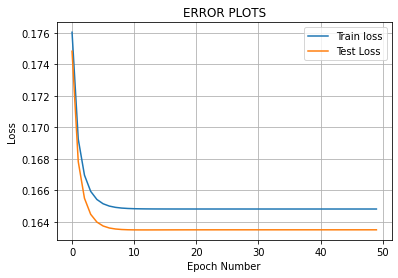

In [39]:
import matplotlib.pyplot as plt
plt.plot(epoch_number,train_loss, label = "Train loss" )
plt.plot(epoch_number,test_loss, label = "Test Loss")
plt.legend()
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


In [40]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5: 
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print("Train accuracy achieved through the custom implementation",1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print("Train accuracy achieved through the custom implementation",1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

Train accuracy achieved through the custom implementation 0.9519466666666667
Train accuracy achieved through the custom implementation 0.94584
